## Template matching using OpenCV in Python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

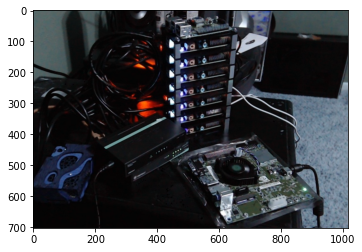

In [6]:
main=cv2.imread('main.jpg')
plt.imshow(main)

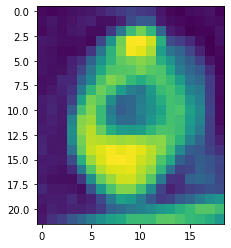

In [11]:
template = cv2.imread('template.jpg',0)
plt.imshow(template)

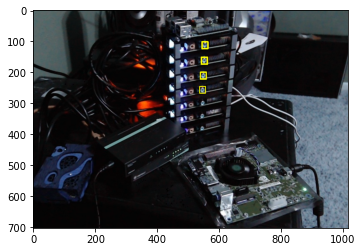

In [9]:
# Read the main image
img_rgb = cv2.imread('main.jpg')
 
# Convert it to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
 
# Read the template
template = cv2.imread('template.jpg',0)
 
# Store width and height of template in w and h
w, h = template.shape[::-1]
 
# Perform match operations.
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
 
# Specify a threshold
threshold = 0.8
 
# Store the coordinates of matched area in a numpy array
loc = np.where( res >= threshold)
 
# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,255,0), 2)
 
# Show the final image with the matched area.
#cv2.imshow('Detected',img_rgb)
#cv2.waitKey()
#cv2.destroyAllWindows()
plt.imshow(img_rgb)

## Opencv Python program for Face Detection

In [16]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')    
  
# capture frames from a camera
cap = cv2.VideoCapture(0)
  
# loop runs if capturing has been initialized.
while 1: 
  
    # reads frames from a camera
    ret, img = cap.read() 
  
    # convert to gray scale of each frames
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    # Detects faces of different sizes in the input image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  
    for (x,y,w,h) in faces:
        # To draw a rectangle in a face 
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
  
        # Detects eyes of different sizes in the input image
        eyes = eye_cascade.detectMultiScale(roi_gray) 
  
        #To draw a rectangle in eyes
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2)
  
    # Display an image in a window
    cv2.imshow('img',img)
  
    # Wait for Esc key to stop
    k = cv2.waitKey(20) & 0xff
    if k == 27:
        break
  
  
    
cap.release()
  
 # De-allocate any associated memory usage
cv2.destroyAllWindows() 


SystemError: <class 'cv2.CascadeClassifier'> returned a result with an error set

## Circle Detection using OpenCV | Python

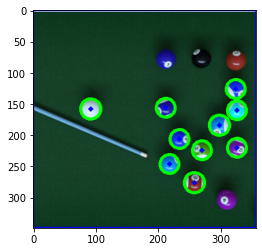

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Read image.

image = cv2.imread('ball.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)
  
  
  
# Draw circles that are detected.
# Convert the circle parameters a, b and r to integers.
detected_circles = np.uint16(np.around(detected_circles))
for pt in detected_circles[0, :]:

        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(image, (a, b), r, (0, 255, 0), 3)
  
        #Draw a small circle (of radius 1) to show the center.
        cv2.circle(image, (a, b), 2, (0, 0, 255), 3)
        #cv2.imshow("Detected Circle", img)
        #cv2.waitKey(0)


plt.imshow(image)
